Text(0.5, 1.0, 'SED on 5jup50au system')

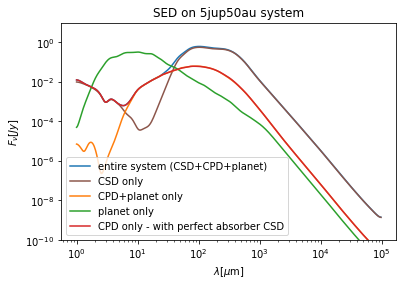

In [6]:
# SED vs cutout cases
model = '5jup50au'
cases = ['5', '0', '1', '2', '3']
specs_full = []
specs_clean = []
labels = ['entire system (CSD+CPD+planet)','CSD only','CPD+planet only','planet only','CPD only - with perfect absorber CSD','planet only - with perfect absorber CPD']
colors = ['#1f77b4','#8c564b', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i in range(len(cases)):
    fname = f'{model}/{cases[i]}/sed_nostar.out'
    specs_full.append(read_spectrum(fname))
    specs_clean.append(plot_spectrum(specs_full[i], label=labels[i], color=colors[i]))
plt.legend(loc=3)
plt.title(f'SED on {model} system')

Text(0.5, 1.0, 'SED - different masses at 30au')

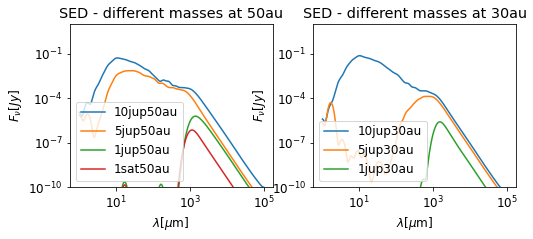

In [159]:
# SED vs masses (entire sys)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
models = ['10jup50au','5jup50au','1jup50au','1sat50au']
specs_full = []
specs_clean = []
for i in range(len(models)):
    fname = f'{models[i]}/4/sed_nostar.out'
    specs_full.append(read_spectrum(fname))
    specs_clean.append(plot_spectrum(specs_full[i], label=models[i]))
plt.legend(loc=3)
plt.title('SED - different masses at 50au')
plt.subplot(1,2,2)
models = ['10jup30au','5jup30au','1jup30au']
specs_full = []
specs_clean = []
for i in range(len(models)):
    fname = f'{models[i]}/4/sed_nostar.out'
    specs_full.append(read_spectrum(fname))
    specs_clean.append(plot_spectrum(specs_full[i], label=models[i]))
plt.legend(loc=3)
plt.title('SED - different masses at 30au')

## Blackbody fitting

/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


[[50, 6.36430206646565e-14],
 [50, 6.365866574795306e-14],
 [81, 2.7501388615432844e-15],
 [833, 1.1146001980997562e-17],
 [17, 2.447159796349748e-14],
 [200, 1.4461003157232312e-23]]

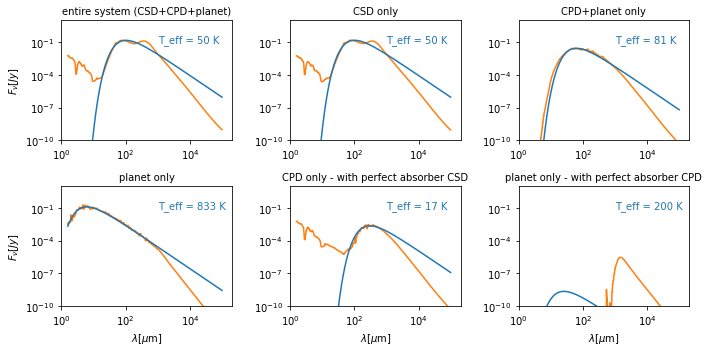

In [3]:
def bbfit(model='10jup50au', init=200, plot=True):
    cases = ['5','0','1','2','3','4']
    labels = ['entire system (CSD+CPD+planet)','CSD only','CPD+planet only','planet only','CPD only - with perfect absorber CSD','planet only - with perfect absorber CPD']
    specs_full = []
    specs_clean = []
    for i in range(len(cases)):
        fname=f'{model}/{cases[i]}/sed_nostar.out'
        specs_full.append(read_spectrum(fname))
        specs_clean.append(plot_spectrum(specs_full[i], plot=False))

    if plot:
        plt.figure(figsize=(10,5))
    result = []
    for i in range(len(cases)):
        spec = specs_clean[i]
        if i == 5 and dir in ['1jup30au', '1jup50au','1sat50au','5jup30au']:
            start = 200
        else:
            start = 20
        x = c.value/(specs_full[i][start:,0] * 1e-6)  # Hz
        y = spec[start:,1]
        coeff, cov = curve_fit(blackbody1, x, y, p0=(init,1e-10), maxfev=2000)
        result.append([int(coeff[0]+0.5),coeff[1]])
        xlam = 1e6*c.value/x
        if plot:
            plt.subplot(2,3,i+1)
            plt.plot(xlam, blackbody1(x, coeff[0],coeff[1]), zorder=10)
            plt.plot(xlam,y)
            plt.xscale('log')
            plt.yscale('log')
            plt.ylim(1e-10,10)
            plt.xlim(1,2e5)
            if i == 3 or i == 4 or i == 5:
                plt.xlabel(r'$\lambda [\mu\mathrm{m}]$')
            plt.title(labels[i], fontsize=10)
            if i == 0 or i == 3:
                plt.ylabel(r'$F_{\nu} [Jy]$')
            plt.text(1000,0.1,'T_eff = {} K'.format(int(coeff[0]+0.5)), color='#1f77b4')
    if plot:
        plt.tight_layout()
    return result
bbfit('1jup30au')

## Paper plots

Text(0.6, 0.55, 'NIRCam')

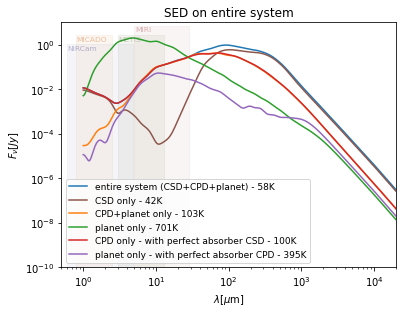

In [22]:
# FINAL PLOT v1
model='10jup50au'
cases = ['5','0','1','2','3','4']
labels = ['entire system (CSD+CPD+planet)','CSD only','CPD+planet only','planet only','CPD only - with perfect absorber CSD','planet only - with perfect absorber CPD']
colors = ['#1f77b4','#8c564b', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
efftemps = [58, 42, 103, 701, 100, 395]
plt.figure(figsize=(6,4.5))
plt.ylim(1e-10,10)
plt.xlim(0.5,2e4)
specs_full = []
specs_clean = []
for i in range(len(cases)):
    fname=f'{model}/{cases[i]}/sed_nostar.out'
    specs_full.append(read_spectrum(fname))
    specs_clean.append(plot_spectrum(specs_full[i], label=labels[i]+' - '+str(efftemps[i])+'K', color=colors[i]))

plt.legend(loc=3,prop={'size': 9})
plt.title('SED on entire system')

plt.gca().axvspan(5, 28, ymax=0.987, alpha=0.04, color='darkred')
plt.text(5.2, 4, 'MIRI', alpha=0.3, color='darkred', fontsize=7.5)

plt.gca().axvspan(3, 13, ymax=0.95, alpha=0.07, color='darkolivegreen')
plt.text(3, 1.45, 'METIS', alpha=0.3, color='darkolivegreen', fontsize=7.5)

plt.gca().axvspan(0.8, 2.45, ymax=0.95, alpha=0.06, color='chocolate')
plt.text(0.8, 1.45, 'MICADO', alpha=0.4, color='chocolate', fontsize=7.5)

#plt.gca().axvspan(0.8, 4.9, ymax=0.91, alpha=0.05, color='midnightblue')
#plt.text(0.8, 0.55, 'NIRISS', alpha=0.3, color='midnightblue', fontsize=7.5)

plt.gca().axvspan(0.6, 4.8, ymax=0.91, alpha=0.04, color='midnightblue')
plt.text(0.6, 0.55, 'NIRCam', alpha=0.3, color='midnightblue', fontsize=7.5)

/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


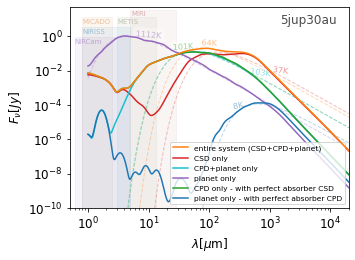

In [294]:
# FINAL PLOT v2
model='5jup30au'
cases = ['5','0','1','2','3','4']
labels = ['entire system (CSD+CPD+planet)','CSD only','CPD+planet only','planet only','CPD only - with perfect absorber CSD','planet only - with perfect absorber CPD']
colors = ['tab:orange', 'tab:red', 'tab:cyan',  'tab:purple','tab:green','tab:blue']
posdict = {'10jup50au':[0, 100, 0, 250, 0, 300, 0, 10, 0, 33, 0, 80], # v1: [0, 12, 0, 17, 0, 7.4, 0, 1, 0, 6.7, 0, 2.1],
           '5jup50au':[0, 100, 0, 220, 0, 80, 0, 10, 0, 170, 0, 80], # v1:[0, 14, 0, 17, 0, 9.3, 0, 1.3, 0, 10.5, 0, 3]
           '1jup50au':[0, 90, 0, 90, 0, 90, 0, 7, 0, 180, 0, 700],
           '1sat50au':[0, 90, 0, 90, 0, 180, 0, 16, 0, 380, 0, 700],
           '10jup30au':[0, 100, 0, 60, 0, 500, 0, 10, 0, 33, 0, 19],
           '5jup30au':[0, 100, 0, 1500, 0, 700, 0, 10, 0, 37, 0, 300], # loc=4
           '1jup30au':[0, 110, 0, 110, 0, 80, 0, 7, 0, 200, 0, 800]
           }
efftemps = bbfit(model, plot=False)
matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,3.7))
specs_full = []
specs_clean = []
for i in range(len(cases)):
    # plot seds
    if i == 0:
        zorder = 10
    else:
        zorder = 3

    fname=f'{model}/{cases[i]}/sed_nostar.out'
    specs_full.append(read_spectrum(fname))
    specs_clean.append(plot_spectrum(specs_full[i], label=labels[i], color=colors[i], zorder=zorder))

    # plot bbs
    coeff = efftemps[i]
    x = specs_clean[i][:,0]
    xnu = c.value/(x * 1e-6)
    plt.plot(x, blackbody1(xnu, coeff[0], coeff[1]),label=str(coeff[0])+'K', color=colors[i], linestyle='dashed', alpha=0.3, linewidth=1)

lines = plt.gca().get_lines()
notinclude = [1,3,5,7,9,11]
pos = posdict[model]
include = [0,2,4,6,8,10]

for i in notinclude:
    labelLine(lines[i], pos[i], va="bottom",alpha=0.3, zorder=2, fontsize=8)

plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=4,prop={'size': 7.5})
plt.text(1500, 5,model,alpha=0.7,fontsize=12)
size=7
plt.gca().axvspan(5, 28, ymax=0.987, alpha=0.04, color='darkred')
plt.text(5.2, 16, 'MIRI', alpha=0.3, color='darkred', fontsize=size)

plt.gca().axvspan(3, 13, ymax=0.95, alpha=0.05, color='darkolivegreen')
plt.text(3, 5, 'METIS', alpha=0.35, color='darkolivegreen', fontsize=size)

plt.gca().axvspan(0.8, 2.45, ymax=0.95, alpha=0.06, color='chocolate')
plt.text(0.8, 5, 'MICADO', alpha=0.4, color='chocolate', fontsize=size)

plt.gca().axvspan(0.8, 4.9, ymax=0.9, alpha=0.07, color='tab:blue')
plt.text(0.8, 1.3, 'NIRISS', alpha=0.4, color='tab:blue', fontsize=size)

plt.gca().axvspan(0.6, 4.8, ymax=0.85, alpha=0.08, color='tab:purple')
plt.text(0.6, 0.35, 'NIRCam', alpha=0.5, color='tab:purple', fontsize=size)

plt.ylim(1e-10,50)
plt.xlim(0.5,2e4)

plt.savefig(f'bbfit_plots/SED_{model}_v1.png',bbox_inches='tight', format='png', dpi=500)


/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/spacegrey/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(functio

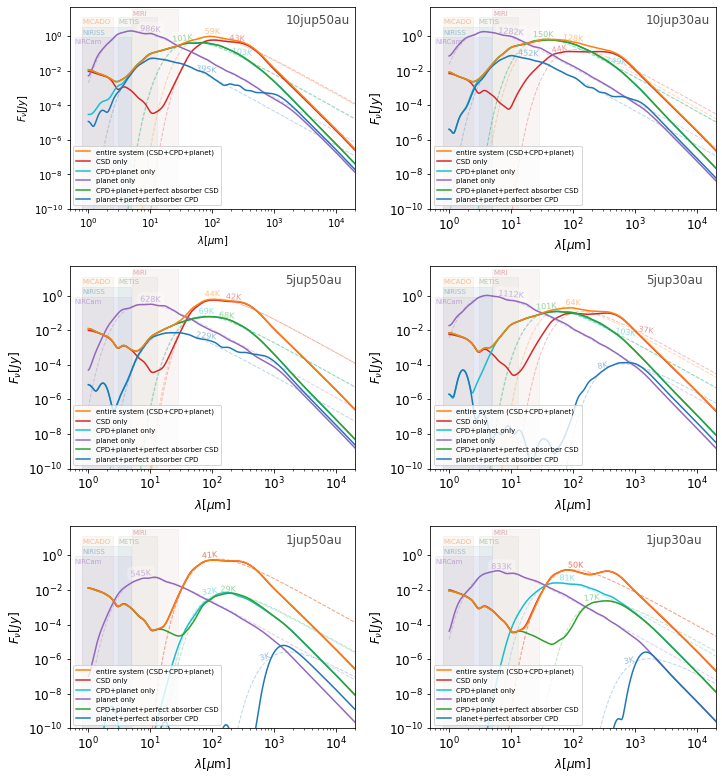

In [4]:
# FINAL PLOT v2 subfigs
models = ['10jup50au','10jup30au','5jup50au','5jup30au','1jup50au','1jup30au']
init = [200,200,200,200,100,100]
cases = ['5','0','1','2','3','4']
labels = ['entire system (CSD+CPD+planet)','CSD only','CPD+planet only','planet only','CPD+planet+perfect absorber CSD','planet+perfect absorber CPD']
colors = ['tab:orange', 'tab:red', 'tab:cyan', 'tab:purple','tab:green','tab:blue']
posdict = {'10jup50au':[0, 100, 0, 250, 0, 300, 0, 10, 0, 33, 0, 80], # v1: [0, 12, 0, 17, 0, 7.4, 0, 1, 0, 6.7, 0, 2.1],
           '5jup50au':[0, 100, 0, 220, 0, 80, 0, 10, 0, 170, 0, 80], # v1:[0, 14, 0, 17, 0, 9.3, 0, 1.3, 0, 10.5, 0, 3]
           '1jup50au':[0, 90, 0, 90, 0, 90, 0, 7, 0, 180, 0, 700],
           '1sat50au':[0, 90, 0, 90, 0, 180, 0, 16, 0, 380, 0, 700],
           '10jup30au':[0, 100, 0, 60, 0, 500, 0, 10, 0, 33, 0, 19],
           '5jup30au':[0, 100, 0, 1500, 0, 700, 0, 10, 0, 37, 0, 300], # loc=4
           '1jup30au':[0, 110, 0, 110, 0, 80, 0, 7, 0, 200, 0, 800]
           }
plt.figure(figsize=(10.2,11))
for j in range(len(models)):
    model = models[j]
    plt.subplot(3,2,j+1)
    efftemps = bbfit(models[j], init=init[j], plot=False)
    matplotlib.rcParams.update({'font.size': 12})
    specs_full = []
    specs_clean = []
    for i in range(len(cases)):
        # plot seds
        if i == 0:
            zorder = 10
        else:
            zorder = 3

        fname=f'{models[j]}/{cases[i]}/sed_nostar.out'
        specs_full.append(read_spectrum(fname))
        specs_clean.append(plot_spectrum(specs_full[i], label=labels[i], color=colors[i], zorder=zorder))

        # plot bbs
        coeff = efftemps[i]
        x = specs_full[i][:,0]
        xnu = c.value/(x * 1e-6)
        plt.plot(x, blackbody1(xnu, coeff[0], coeff[1]),label=str(coeff[0])+'K', color=colors[i], linestyle='dashed', alpha=0.3, linewidth=1)

    lines = plt.gca().get_lines()
    notinclude = [1,3,5,7,9,11]
    include = [0,2,4,6,8,10]
    pos = posdict[models[j]]

    for i in notinclude:
        labelLine(lines[i], pos[i], va="bottom", alpha=0.3, zorder=2, fontsize=8)

    plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=3,prop={'size': 7})
    plt.text(1500, 5,models[j],alpha=0.7,fontsize=12)
    size=7
    plt.gca().axvspan(5, 28, ymax=0.987, alpha=0.04, color='darkred')
    plt.text(5.2, 16, 'MIRI', alpha=0.3, color='darkred', fontsize=size)
    plt.gca().axvspan(3, 13, ymax=0.95, alpha=0.05, color='darkolivegreen')
    plt.text(3, 5, 'METIS', alpha=0.35, color='darkolivegreen', fontsize=size)
    plt.gca().axvspan(0.8, 2.45, ymax=0.95, alpha=0.06, color='chocolate')
    plt.text(0.8, 5, 'MICADO', alpha=0.4, color='chocolate', fontsize=size)
    plt.gca().axvspan(0.8, 4.9, ymax=0.9, alpha=0.07, color='tab:blue')
    plt.text(0.8, 1.3, 'NIRISS', alpha=0.4, color='tab:blue', fontsize=size)
    plt.gca().axvspan(0.6, 4.8, ymax=0.85, alpha=0.08, color='tab:purple')
    plt.text(0.6, 0.35, 'NIRCam', alpha=0.5, color='tab:purple', fontsize=size)
    plt.ylim(1e-10,50)
    plt.xlim(0.5,2e4)
    plt.tight_layout()
plt.savefig(f'bbfit_plots/SED_all.png', bbox_inches='tight',format='png', dpi=500)

In [119]:
# if need eps
from PIL import Image
image_png = 'bbfit_plots/SED_10jup50au_v34.png'
im = Image.open(image_png)
print(im.mode)
fig = im.convert('RGB')
fig.save('bbfit_plots/SED_10jup50au_v34.eps')

RGBA


## Other test SED plots

[]

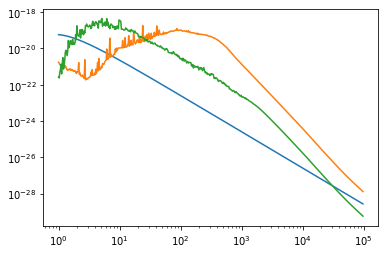

In [19]:
# sun blackbody vs planet blackbody vs system
from astropy.modeling.models import BlackBody
bb = BlackBody(temperature=5780*u.K)
spec_ori = read_spectrum('10jup50au/5/sed_nostar.out')
spec_2 = read_spectrum('10jup50au/2/sed_nostar.out')
x = spec_2[:,0]
y_ori = spec_ori[:,1]
y_2 = spec_2[:,1]
starflux = bb(x * u.um) * 1.6e-15

plt.plot(x,starflux)
plt.plot(x,y_ori)
plt.plot(x,y_2)
plt.xscale('log')
plt.yscale('log')
plt.plot()

Text(0.5, 1.0, 'CPD+planet only / CSD only contrast')

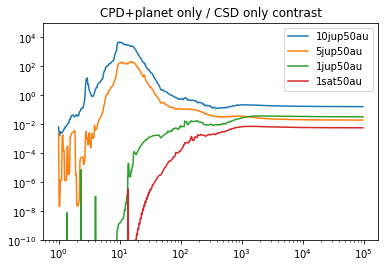

In [23]:
# CPD+planet only - CSD only contrast
for dir in ['10jup50au','5jup50au','1jup50au','1sat50au']:
    spec_CPD = plot_spectrum(read_spectrum(f'{dir}/1/sed_nostar.out'), option='smooth', plot=False) # CPD+planet only
    spec_CSD = plot_spectrum(read_spectrum(f'{dir}/0/sed_nostar.out'), option='smooth', plot=False) # CSD only
    x = spec_CSD[:,0]
    y_CPD = spec_CPD[:,1]
    y_CSD = spec_CSD[:,1]
    contrast = y_CPD / y_CSD

    plt.plot(x,contrast, label=dir)
#plt.plot(x,y_CPD)
#plt.plot(x,y_CSD)
plt.xscale('log')
plt.yscale('log')
plt.plot()
plt.ylim(1e-10,1e5)
plt.legend()
plt.title('CPD+planet only / CSD only contrast')

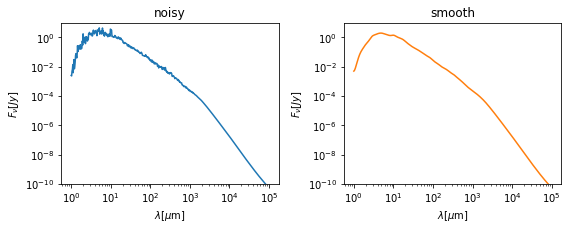

In [21]:
# smooth vs clean
fname = '10jup50au/2/sed_nostar.out'
spec_ori_clean = read_spectrum(fname)

plt.figure(figsize=(8,3.3))
plt.subplot(1,2,1)
plot_spectrum(spec_ori_clean, option='full')
plt.title('noisy')

plt.subplot(1,2,2)
plot_spectrum(spec_ori_clean, option='smooth', color='#ff7f0e')
plt.title('smooth')
plt.tight_layout()